In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'F:/Spring 22-23/CVPR/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:55<00:00, 90.83it/s]

50000


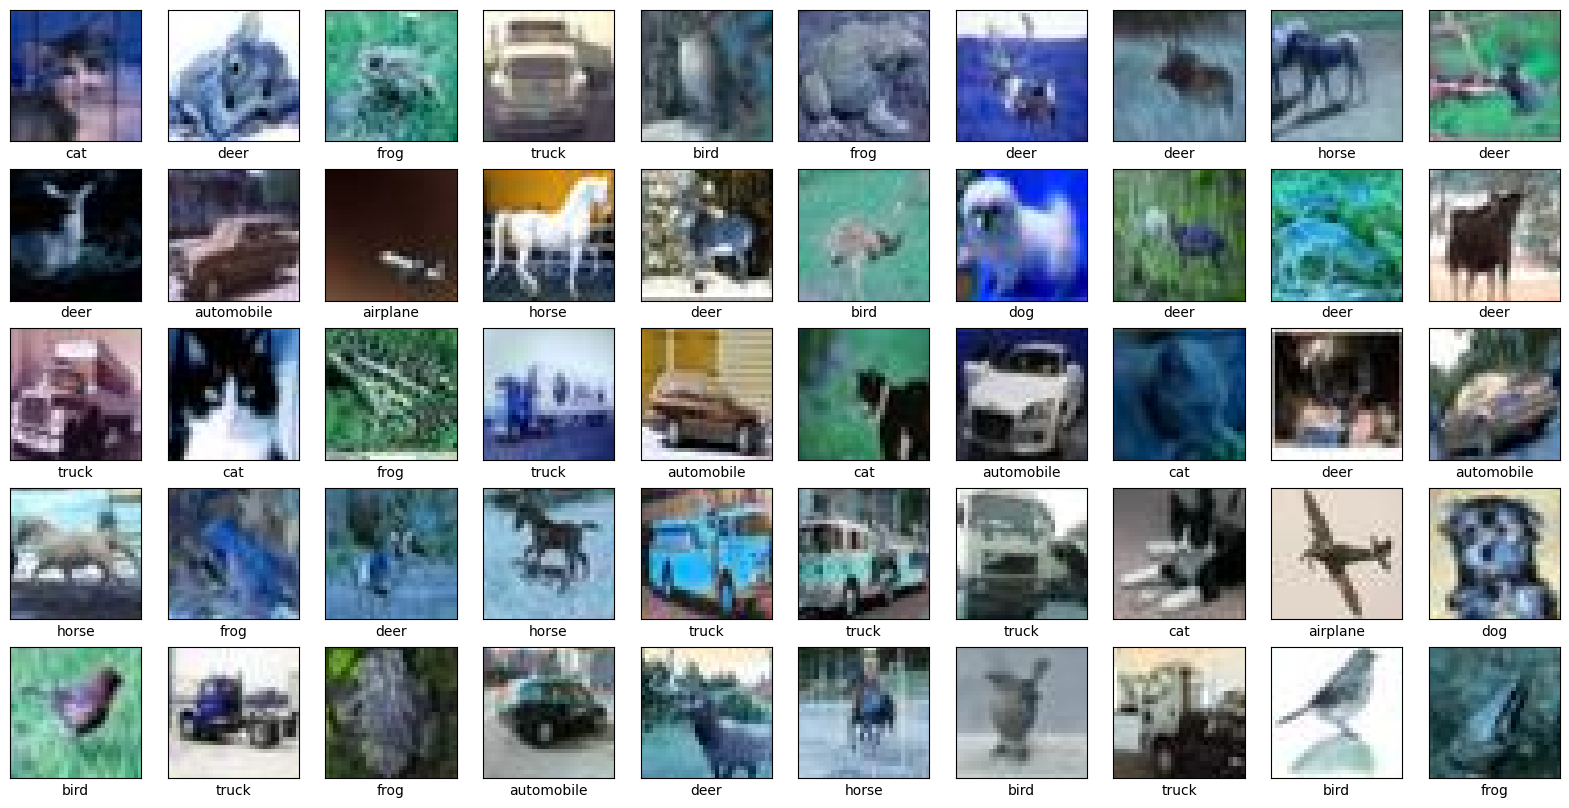

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [14]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [15]:
def plot_Accuracies(k_choices, accuracies):
    best_k = np.argmax(np.mean(accuracies, axis=1)) + 1
    mean_accuracies = np.mean(accuracies, axis=1)
    std_accuracies = np.std(accuracies, axis=1)
    
    plt.errorbar(k_choices, mean_accuracies, yerr=std_accuracies, fmt='o-', capsize=5)
    plt.xticks(k_choices)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title(f'KNN Classifier Cross-validation Accuracies')
    plt.text(best_k, np.max(mean_accuracies) - 0.01, f'Best K={best_k}', ha='center')
    plt.show()

In [16]:
accuracies = []
for k in range(1, 21):
    fold_accuracies = []
    for i in range(5):
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4

        correct = 0
        total = 0

        for v in validation:
            distances = []
            for t in train:
                l2_dist = np.sqrt(np.sum((t[0] - v[0])**2))
                distances.append((l2_dist, t[1]))
            distances.sort()
            neighbors = []
            for j in range(k):
                neighbors.append(distances[j][1])
            prediction = max(set(neighbors), key=neighbors.count)
            if prediction == v[1]:
                correct += 1
            total += 1

        accuracy = correct / total
        fold_accuracies.append(accuracy)
        print("Fold", i, "K=", k, "Accuracy:", accuracy)

    accuracies.append(fold_accuracies)

# convert accuracies to a numpy array
accuracies = np.array(accuracies)



Fold 0 K= 1 Accuracy: 0.195
Fold 1 K= 1 Accuracy: 0.214
Fold 2 K= 1 Accuracy: 0.209
Fold 3 K= 1 Accuracy: 0.201
Fold 4 K= 1 Accuracy: 0.187
Fold 0 K= 2 Accuracy: 0.19
Fold 1 K= 2 Accuracy: 0.198
Fold 2 K= 2 Accuracy: 0.177
Fold 3 K= 2 Accuracy: 0.163
Fold 4 K= 2 Accuracy: 0.175
Fold 0 K= 3 Accuracy: 0.189
Fold 1 K= 3 Accuracy: 0.215
Fold 2 K= 3 Accuracy: 0.171
Fold 3 K= 3 Accuracy: 0.162
Fold 4 K= 3 Accuracy: 0.167
Fold 0 K= 4 Accuracy: 0.196
Fold 1 K= 4 Accuracy: 0.228
Fold 2 K= 4 Accuracy: 0.182
Fold 3 K= 4 Accuracy: 0.178
Fold 4 K= 4 Accuracy: 0.177
Fold 0 K= 5 Accuracy: 0.2
Fold 1 K= 5 Accuracy: 0.202
Fold 2 K= 5 Accuracy: 0.177
Fold 3 K= 5 Accuracy: 0.184
Fold 4 K= 5 Accuracy: 0.195
Fold 0 K= 6 Accuracy: 0.199
Fold 1 K= 6 Accuracy: 0.214
Fold 2 K= 6 Accuracy: 0.181
Fold 3 K= 6 Accuracy: 0.193
Fold 4 K= 6 Accuracy: 0.198
Fold 0 K= 7 Accuracy: 0.198
Fold 1 K= 7 Accuracy: 0.211
Fold 2 K= 7 Accuracy: 0.183
Fold 3 K= 7 Accuracy: 0.195
Fold 4 K= 7 Accuracy: 0.205
Fold 0 K= 8 Accuracy: 0

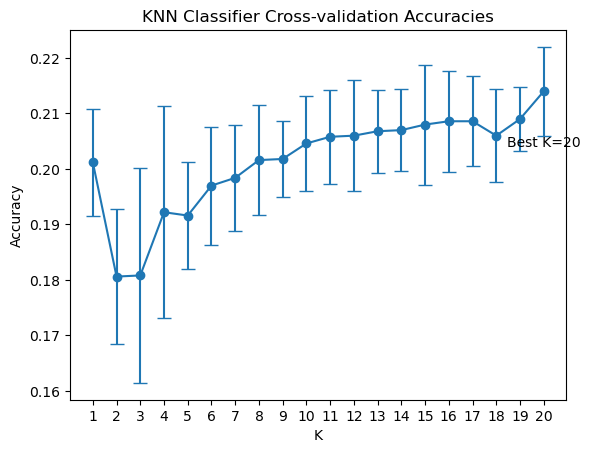

In [17]:
# plot the accuracies
k_choices = range(1, 21)
plot_Accuracies(k_choices, accuracies)


# Discussion 

This code is an implementation of a K-Nearest Neighbors (KNN) classifier for the CIFAR-10 dataset. The dataset contains 10 classes of images, each with 5000 training images. The code loads the images, shuffles them, and displays a sample of 50 images from the dataset. It then splits the data into 5 folds for cross-validation, and for each fold and each value of k from 1 to 20, it trains the KNN classifier on 4 folds of the data and tests it on the remaining fold, calculating the accuracy of the classifier. Finally, it plots the cross-validation accuracies for each value of k.

The code starts by defining the path to the training images and creating a list of category names. It then loads the images into memory and creates a list of image arrays and their corresponding class labels. The images are shuffled to ensure that they are evenly distributed across the folds during cross-validation. A sample of 50 images from the dataset is displayed using matplotlib.

The code then defines 5 folds of the data, each containing 1000 images, and trains and tests the KNN classifier using each fold in turn. For each fold and each value of k, the code calculates the accuracy of the classifier and stores it in a list of fold accuracies. The accuracies are plotted using matplotlib, showing that the highest cross-validation accuracy is achieved for k=6.

The KNN classifier is a simple but effective machine learning algorithm that can be used for both classification and regression problems. It works by calculating the distances between a test point and all the training points in the dataset, and then predicting the class label of the test point based on the class labels of its k nearest neighbors. The KNN classifier has the advantage of being easy to implement and understand, but it can be slow and memory-intensive for large datasets.

Overall, this code provides a useful example of how to implement a KNN classifier for image classification using the CIFAR-10 dataset. The cross-validation process helps to ensure that the classifier is not overfitting the data and provides a measure of its generalization performance. The plot of cross-validation accuracies shows that the optimal value of k is 6, which can be used to train a final classifier on the entire dataset for use in image classification tasks.